<a href="https://colab.research.google.com/github/AVJdataminer/Courses/blob/master/Nina_15SEP2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Click on the button below to open this notebook located on my google drive folder.
If you use this you need to chage the sharing settings to anyone can view.

<a href="https://colab.research.google.com/drive/1Jh58NuEao-4fjgYVrspuKCBiotj19E-9#scrollTo=acm_tHuyiNN7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Reviewing predicted observations probabilities
- Reviewing rf feature importances
- time series rolling means and plots
- - Add google colab button to open

In [112]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris = load_iris()
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [58]:
x = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=1)

In [27]:
import time
from sklearn.ensemble import RandomForestClassifier
t = time.process_time()
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
elapsed_time = time.process_time() - t
print('Time for Model Fitting:'+str(elapsed_time))
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test) #getting probability of each class


Time for Model Fitting:0.00011988500000015279


# Review actual classes with predicted values and predicted probabilites

In [51]:
#predicted for test data subset
test=pd.DataFrame(X_test) 
test['y_actual']=y_test
test['y_pred'] = model_res.predict(X_test)
test.head()

,0,1,2,3,y_actual,y_pred
0,5.8,4.0,1.2,0.2,0,0
1,5.1,2.5,3.0,1.1,1,1
2,6.6,3.0,4.4,1.4,1,1
3,5.4,3.9,1.3,0.4,0,0
4,7.9,3.8,6.4,2.0,2,2


In [52]:
#predicted probabilites for test data subset
y_pred_prob =pd.DataFrame(model_res.predict_proba(X_test)) #probabilities for each of the three classes
y_pred_prob.columns = ['p1','p2','p3'] #naming the probability columns to match classes
df1 = pd.concat([test,y_pred_prob],axis=1, sort=False)
df1.head()

,0,1,2,3,y_actual,y_pred,p1,p2,p3
0,5.8,4.0,1.2,0.2,0,0,0.946667,0.053333,0.000000
1,5.1,2.5,3.0,1.1,1,1,0.000000,0.983333,0.016667
2,6.6,3.0,4.4,1.4,1,1,0.000000,1.000000,0.000000
3,5.4,3.9,1.3,0.4,0,0,1.000000,0.000000,0.000000
4,7.9,3.8,6.4,2.0,2,2,0.003333,0.003333,0.993333


## Repeat with whole data frame


In [66]:
#predicted for whole data frame
df['y_actual']= y
df['y_pred'] = model_res.predict(x)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,y_actual,y_pred
0,5.1,3.5,1.4,0.2,0.0,setosa,0,0
1,4.9,3.0,1.4,0.2,0.0,setosa,0,0
2,4.7,3.2,1.3,0.2,0.0,setosa,0,0
3,4.6,3.1,1.5,0.2,0.0,setosa,0,0
4,5.0,3.6,1.4,0.2,0.0,setosa,0,0


In [67]:
#predicted probabilites for test data subset
y_pred_prob =pd.DataFrame(model_res.predict_proba(x)) #probabilities for each of the three classes
y_pred_prob.columns = ['p1','p2','p3'] #naming the probability columns to match classes
df = pd.concat([df,y_pred_prob],axis=1, sort=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,y_actual,y_pred,p1,p2,p3
0,5.1,3.5,1.4,0.2,0.0,setosa,0,0,1.0,0.000000,0.000000
1,4.9,3.0,1.4,0.2,0.0,setosa,0,0,1.0,0.000000,0.000000
2,4.7,3.2,1.3,0.2,0.0,setosa,0,0,1.0,0.000000,0.000000
3,4.6,3.1,1.5,0.2,0.0,setosa,0,0,1.0,0.000000,0.000000
4,5.0,3.6,1.4,0.2,0.0,setosa,0,0,1.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica,2,2,0.0,0.003333,0.996667
146,6.3,2.5,5.0,1.9,2.0,virginica,2,2,0.0,0.050000,0.950000
147,6.5,3.0,5.2,2.0,2.0,virginica,2,2,0.0,0.000000,1.000000
148,6.2,3.4,5.4,2.3,2.0,virginica,2,2,0.0,0.000000,1.000000


In [76]:
#sort by probabilities of class 3
df = df.sort_values('p2',ascending=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,y_actual,y_pred,p1,p2,p3
74,6.4,2.9,4.3,1.3,1.0,versicolor,1,1,0.0,1.0,0.0
67,5.8,2.7,4.1,1.0,1.0,versicolor,1,1,0.0,1.0,0.0
65,6.7,3.1,4.4,1.4,1.0,versicolor,1,1,0.0,1.0,0.0
64,5.6,2.9,3.6,1.3,1.0,versicolor,1,1,0.0,1.0,0.0
71,6.1,2.8,4.0,1.3,1.0,versicolor,1,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
46,5.1,3.8,1.6,0.2,0.0,setosa,0,0,1.0,0.0,0.0
44,5.1,3.8,1.9,0.4,0.0,setosa,0,0,1.0,0.0,0.0
40,5.0,3.5,1.3,0.3,0.0,setosa,0,0,1.0,0.0,0.0
39,5.1,3.4,1.5,0.2,0.0,setosa,0,0,1.0,0.0,0.0


# Feature Importances



## plot with matplotlib

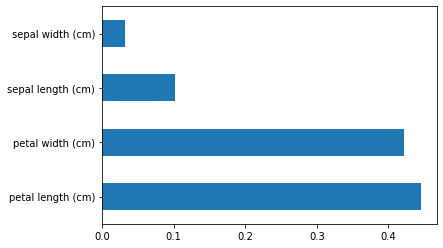

In [84]:
importances = clf.feature_importances_
# Rearrange feature names so they match the sorted feature importances
names = iris['feature_names']
feat_importances = pd.Series(clf.feature_importances_, index = names)
feat_importances.nlargest(20).plot(kind='barh')

## plot with altair module

In [78]:
#! pip install altair vega_datasets

In [94]:
import altair as alt
fi = pd.DataFrame(feat_importances).reset_index()
fi.columns = ['feature','importance']

alt.Chart(fi).mark_bar().encode(
    x='importance',
    y='feature',
    color ='feature'
)

alt.Chart(...)

# Calculating rolling means

In [122]:
from vega_datasets import data
#import stock data for eaxmple
source = data.stocks()
cnt = source[(source['symbol']=='AAPL')].reset_index() #select only apple stock
cnt.head()

,index,symbol,date,price
0,437,AAPL,2000-01-01,25.94
1,438,AAPL,2000-02-01,28.66
2,439,AAPL,2000-03-01,33.95
3,440,AAPL,2000-04-01,31.01
4,441,AAPL,2000-05-01,21.00


In [123]:
#adding rolling means of 3 days and 7 days
cnt['rolling_mean'] = cnt.price.rolling(window=3).mean()
cnt['rolling_mean2'] = cnt.price.rolling(window=7).mean()
cnt.head()

,index,symbol,date,price,rolling_mean,rolling_mean2
0,437,AAPL,2000-01-01,25.94,NaN,NaN
1,438,AAPL,2000-02-01,28.66,NaN,NaN
2,439,AAPL,2000-03-01,33.95,29.516667,NaN
3,440,AAPL,2000-04-01,31.01,31.206667,NaN
4,441,AAPL,2000-05-01,21.00,28.653333,NaN


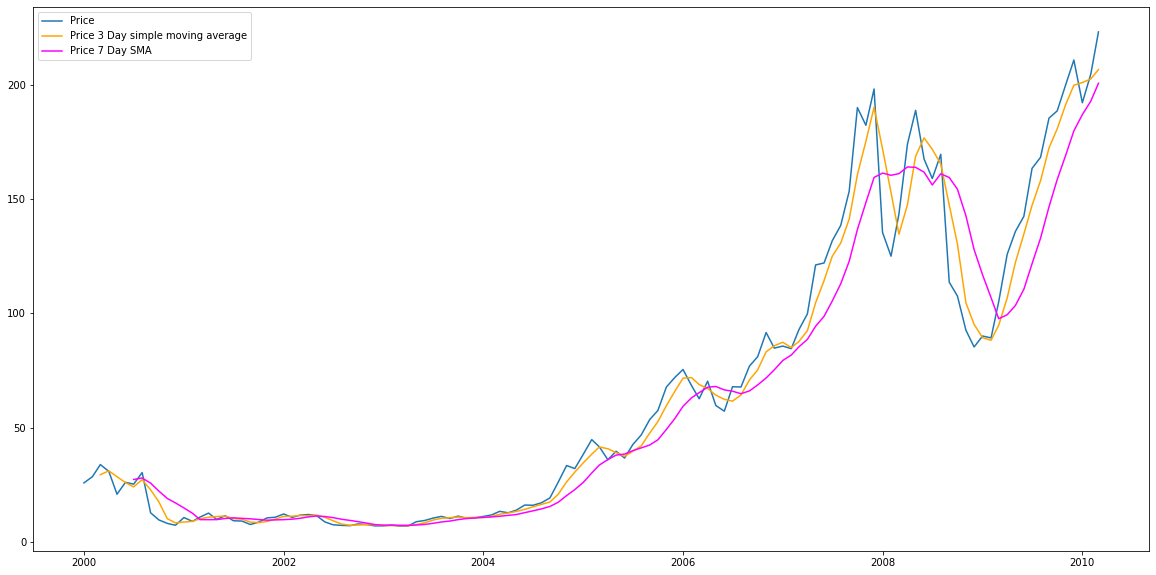

In [124]:
#plot the rolling means with original price
plt.figure(figsize=(20,10))
plt.plot(cnt.date, cnt.price, label='Price')
plt.plot(cnt.date, rolling_mean, label='Price 3 Day simple moving average', color='orange')
plt.plot(cnt.date, rolling_mean2, label='Price 7 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()